## Process & visualize USDA NASS maize data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
from palettable.colorbrewer.sequential import YlGn_9

from ideotype.nass_process import read_nass, nass_summarize

In [2]:
# Read in & process USDA NASS data
df_nass = read_nass()
df_nass = df_nass.query('year>=1961 & year<=2014')

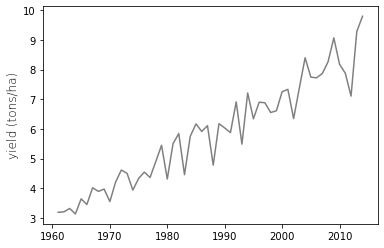

In [4]:
# Average maize yield over years
plt.plot(df_nass.groupby('year').mean()['yield'], c='grey')
plt.ylabel('yield (tons/ha)', fontweight='light', fontsize=12)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/obs_yield_trend.png', format='png', dpi=800)

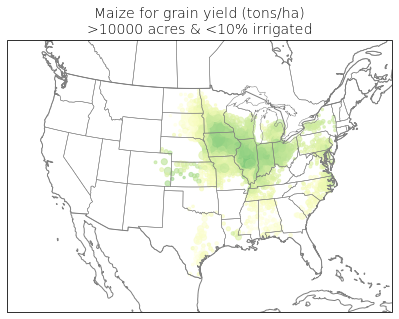

In [6]:
# Filters for year, planting area, & irrigation level
year_start = 1961
year_end = 2005
area = 10000/2.47
irri = 10

# Filter NASS data
df_nass_summary = nass_summarize(year_start, year_end)
df_sub = df_nass_summary.query(f'(area > {area}) & (perct_irri < {irri})')

# Visualize yield
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
                     central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123,-72,19,53])
ax.scatter(df_sub.lon, df_sub.lat, 
           transform=ccrs.PlateCarree(),
           c=df_sub['yield'],
           s=df_sub['area']/700,
           cmap=YlGn_9.mpl_colormap, alpha=0.6,
           vmin=3, vmax=14)

ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title(f'Maize for grain yield (tons/ha)\n'
             f'>{int(area*2.47)} acres & <{irri}% irrigated',
             fontweight='light', fontsize=14)

fig.subplots_adjust(wspace=0.1, hspace=-0.8)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/obs_yiled_map_6105.png', format='png', dpi=800)

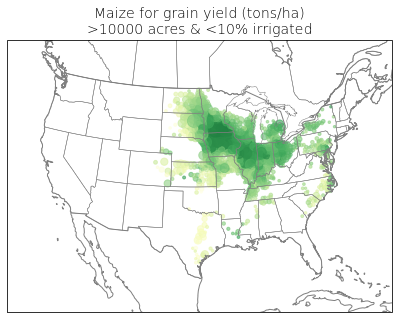

In [7]:
# Filters for year, planting area, & irrigation level
year_start = 2005
year_end = 2012
area = 10000/2.47
irri = 10

# Filter NASS data
df_nass_summary = nass_summarize(year_start, year_end)
df_sub = df_nass_summary.query(f'(area > {area}) & (perct_irri < {irri})')

# Visualize yield
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
                     central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123,-72,19,53])
ax.scatter(df_sub.lon, df_sub.lat, 
           transform=ccrs.PlateCarree(),
           c=df_sub['yield'],
           s=df_sub['area']/700,
           cmap=YlGn_9.mpl_colormap, alpha=0.6,
           vmin=3, vmax=14)

ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title(f'Maize for grain yield (tons/ha)\n'
             f'>{int(area*2.47)} acres & <{irri}% irrigated',
             fontweight='light', fontsize=14)

fig.subplots_adjust(wspace=0.1, hspace=-0.8)

plt.savefig('/home/disk/eos8/ach315/upscale/figs/obs_yiled_map_0512.png', format='png', dpi=800)

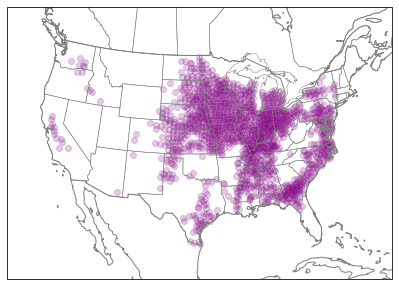

In [124]:
area = 10000
df_nass_grouped = df_nass_summary.groupby(['state_id','county_id']).mean()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
                     central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123,-72,19,53])
df_sub = df_nass_grouped.query(f'area > {area/2.27}')
ax.scatter(df_sub.lon, df_sub.lat, 
           transform=ccrs.PlateCarree(), c='purple', alpha=0.2)

ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)

fig.subplots_adjust(wspace=0.1, hspace=-0.8)

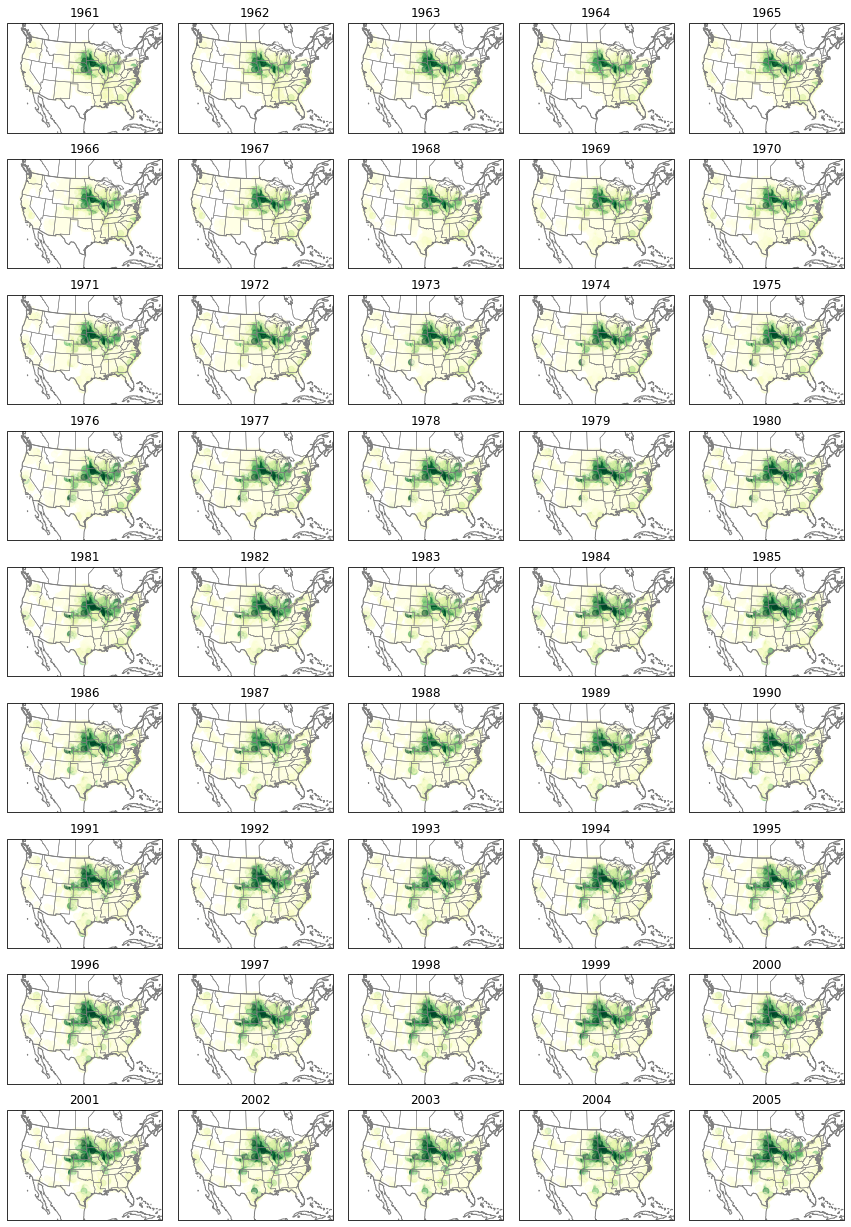

In [16]:
years = list(np.arange(1961,2006))

fig = plt.figure(figsize=(15,30))
for item in np.arange(45):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
                         central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123,-72,19,53])
    df_year = df_nass[df_nass.year == years[item]]
    ax.scatter(df_year.lon, df_year.lat, 
               transform=ccrs.PlateCarree(),
               c=df_year.area,
               cmap=YlGn_9.mpl_colormap, vmin=1000, vmax=50000, alpha=0.5)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set_title(years[item])

fig.subplots_adjust(wspace=0.1, hspace=-0.75)

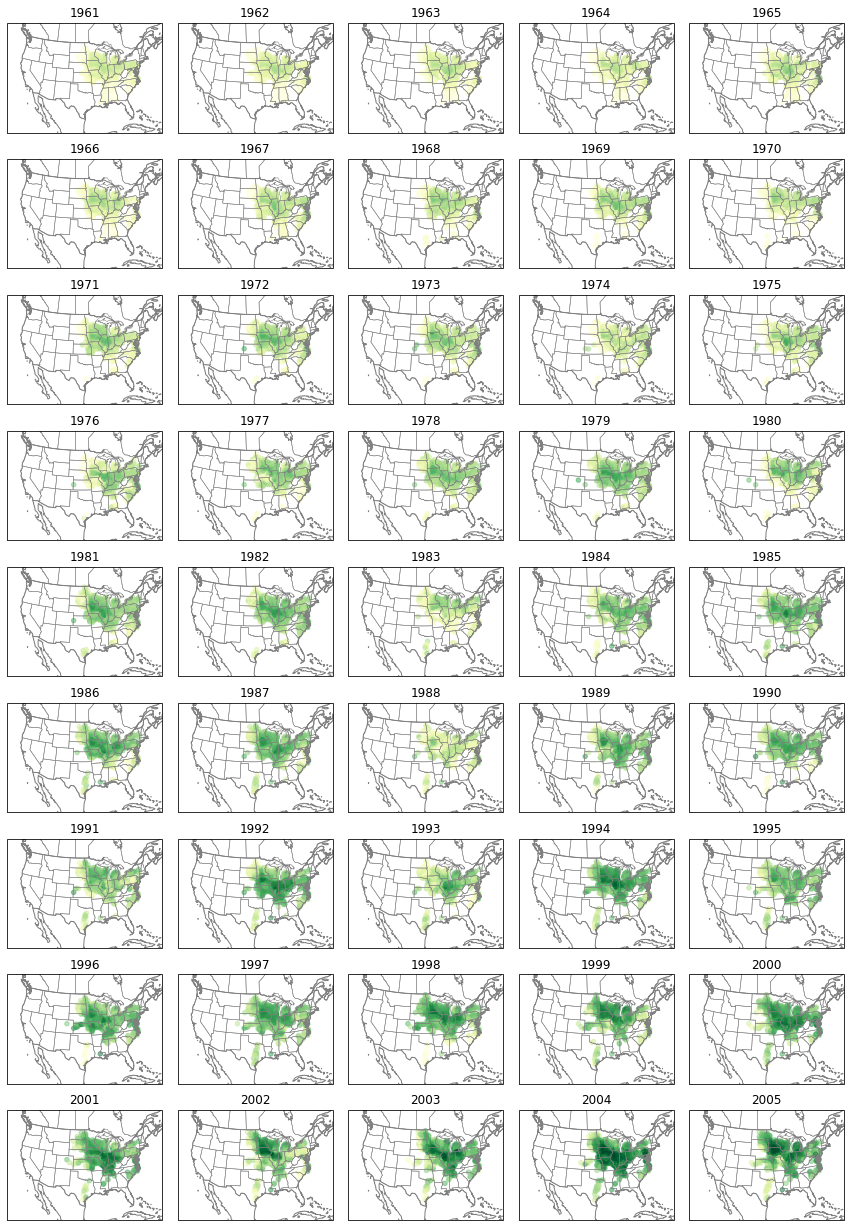

In [18]:
# Filters
area = 10000/2.47  # acre convert to ha
perct_irri = 5

# Figure
years = list(np.arange(1961,2006))

fig = plt.figure(figsize=(15,30))
for item in np.arange(45):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
                         central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123,-72,19,53])
    df_year = nass_summarize(years[item], years[item])
    df_sub = df_year.query(f'(area > {area}) & (perct_irri < {perct_irri})')
    ax.scatter(df_sub.lon, df_sub.lat, 
               transform=ccrs.PlateCarree(),
               c=df_sub['yield'], s=20,
               cmap=YlGn_9.mpl_colormap, vmin=2, vmax=12, alpha=0.5)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set_title(years[item])

fig.subplots_adjust(wspace=0.1, hspace=-0.75)